## Sentiment Analysis & Topic Detection for global Newspaper Articles

This is the final workbook, which ties everything of the project together. At first the data preprocessing pipeline is called for three selected words. [Trump, Brexit, Syria]. All Articles containing these words are selected.

Afterwards the models are applied: The Sentiment analysis finding out the tendencies of each newspaper article and the LDA to detect the topics. The LDA analysis to find out the exact amount of topics was carried out in separate workbooks.

In the bottom part of the notebook a visualization tool is presented, that shows the findings of each model and allows the analysis of the findings.

In [15]:
## Library Imports
import text_transformer as tt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from ipywidgets import widgets
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from lda_utils import *


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Preprocessing Pipelines and filtering Articles

In [9]:
## The preprocessing pipeline for the filter_word "Trump"
remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Trump"]
%time articles_t, tokenized_t = tt.preprocessing(directory="articles", verbose= False, remove_words=remove_tokens, filter_words=filter_words)
trump_df = pd.DataFrame.from_dict(articles_t)

We're at 0.0% of the data.
We're at 2.51% of the data.
We're at 5.01% of the data.
We're at 7.52% of the data.
We're at 10.03% of the data.
We're at 12.53% of the data.
We're at 15.04% of the data.
We're at 17.54% of the data.
We're at 20.05% of the data.
We're at 22.56% of the data.
We're at 25.06% of the data.
We're at 27.57% of the data.
We're at 30.08% of the data.
We're at 32.58% of the data.
We're at 35.09% of the data.
We're at 37.59% of the data.
We're at 40.1% of the data.
We're at 42.61% of the data.
We're at 45.11% of the data.
We're at 47.62% of the data.
We're at 50.13% of the data.
We're at 52.63% of the data.
We're at 55.14% of the data.
We're at 57.65% of the data.
We're at 60.15% of the data.
We're at 62.66% of the data.
We're at 65.16% of the data.
We're at 67.67% of the data.
We're at 70.18% of the data.
We're at 72.68% of the data.
We're at 75.19% of the data.
We're at 77.7% of the data.
We're at 80.2% of the data.
We're at 82.71% of the data.
We're at 85.22% of the

In [10]:
## The preprocessing pipeline for the filter_word "Brexit"
remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Brexit"]
%time articles_b, tokenized_b = tt.preprocessing(directory="articles", verbose= False, remove_words=remove_tokens, filter_words=filter_words)
brexit_df = pd.DataFrame.from_dict(articles_b)

CPU times: user 3min 13s, sys: 16.7 s, total: 3min 30s
Wall time: 3min 42s


In [11]:
## The preprocessing pipeline for the filter_word "Syria"
remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Syria"]
%time articles_s, tokenized_s = tt.preprocessing(directory="articles", verbose= False, remove_words=remove_tokens, filter_words=filter_words)
syria_df = pd.DataFrame.from_dict(articles_s)

We're at 0.0% of the data.
We're at 2.51% of the data.
We're at 5.01% of the data.
We're at 7.52% of the data.
We're at 10.03% of the data.
We're at 12.53% of the data.
We're at 15.04% of the data.
We're at 17.54% of the data.
We're at 20.05% of the data.
We're at 22.56% of the data.
We're at 25.06% of the data.
We're at 27.57% of the data.
We're at 30.08% of the data.
We're at 32.58% of the data.
We're at 35.09% of the data.
We're at 37.59% of the data.
We're at 40.1% of the data.
We're at 42.61% of the data.
We're at 45.11% of the data.
We're at 47.62% of the data.
We're at 50.13% of the data.
We're at 52.63% of the data.
We're at 55.14% of the data.
We're at 57.65% of the data.
We're at 60.15% of the data.
We're at 62.66% of the data.
We're at 65.16% of the data.
We're at 67.67% of the data.
We're at 70.18% of the data.
We're at 72.68% of the data.
We're at 75.19% of the data.
We're at 77.7% of the data.
We're at 80.2% of the data.
We're at 82.71% of the data.
We're at 85.22% of the

### Applied Models (Sentiment Analysis & LDA)

In [142]:
# returns the topic with the highest probability
def get_topic_doc(lda_model, corpus, idx):
    temp_list = lda_model[corpus[idx]].copy() # this copy is essential as the model computes the probs with slight diffs
    prob_list = [i[1] for i in temp_list] # construct a flattened list with all probs
    
    return temp_list[np.argmax(prob_list)][0] #take the highest probability and return the topic

In [16]:
# LDA for "Trump"
dictionary_LDA_t = dictionary_LDA(tokenized_t) # create an LDA Dictionary
corpus_t = corpus(dictionary_LDA_t, tokenized_t) # create the corpus

# intitializing a LDA model with 14 topics using the 0.01 as eta and alpha -> refer to the respective notebook
lda_model_trump = LDA_model(corpus_t, 14, dictionary_LDA_t)

In [157]:
# adding each topic and the filter_word to the df
trump_df["topic"] = [get_topic_doc(lda_model_trump, corpus_t, row) for row in range(trump_df.shape[0])]
trump_df["filter_word"] = "trump"

In [164]:
# LDA for "Syria"
dictionary_LDA_s = dictionary_LDA(tokenized_s) 
corpus_s = corpus(dictionary_LDA_s, tokenized_s) 

# intitializing a LDA model with 6 topics using 0.8 as eta and 0.11 as alpha -> refer to the respective notebook
lda_model_syria = LDA_model(corpus_s, 6, dictionary_LDA_s, eta=0.8, alpha=0.11)

In [165]:
# adding each topic and the filter_word to the df
syria_df["topic"] = [get_topic_doc(lda_model_syria, corpus_s, row) for row in range(syria_df.shape[0])]
syria_df["filter_word"] = "syria"

In [166]:
# LDA for "Brexit"
dictionary_LDA_b = dictionary_LDA(tokenized_b) 
corpus_b = corpus(dictionary_LDA_b, tokenized_b) 

# intitializing a LDA model with 7 topics using the standard values for eta and alpha -> refer to the respective notebook
lda_model_brexit = LDA_model(corpus_b, 7, dictionary_LDA_b, eta=0.01, alpha=0.01)

In [167]:
# adding each topic and the filter_word to the df
brexit_df["topic"] = [get_topic_doc(lda_model_brexit, corpus_b, row) for row in range(brexit_df.shape[0])]
brexit_df["filter_word"] = "brexit"

In [199]:
# merge the dataframes
frames = [trump_df, syria_df, brexit_df]
articles_df = pd.concat(frames)
articles_df = articles_df.reset_index()
articles_df["topic_label"] = articles_df["filter_word"] + "_" + articles_df["topic"].map(str) # get a combined label

In [190]:
# apply sentiment analysis
sia = SentimentIntensityAnalyzer()
articles_df = articles_df.merge(articles_df.text.apply(lambda article: pd.Series(sia.polarity_scores(article))), 
    left_index=True, right_index=True)

In [203]:
# get all unique values for that column to pass as options to the viz
topics = articles_df.topic_label.unique()

### Color palette for the selected newspapers

In [209]:
colors = {
    'dailymail': "#004db3",
    'thetimes': '#333333',
    'theguardian': '#052962',
    'reuters': '#ff8000',
    'ft': '#fff1e5',
    'euronews':'#003865',
    'yahoo': '#400090',
    'wsj': '#333333',
    'breitbart': '#ff550f',
    'foxnews': '#c20017',
    'aljazeera': '#fa9000',
    'nytimes': '#333333',
    'cbc': '#e60505',
    'nbcnews': '#102039',
    'latimes': '#333333',
    'go': '#ffffff',
    'huffpost': '#0DBE98'
}

In [210]:
%matplotlib notebook

# Axis to be ploted, possible options neg, pos, neu and compound
y_axis="pos"
x_axis="neg"

#https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
# Ploting a regression line in matplotlib is strangly hard
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    ax = plt.gca()
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color=colors[drop_newspapers.value])

def action(words):
    plt.cla()
    ax=plt.gca()
    ax.set_xlim([-0.025,0.4])
    ax.set_ylim([-0.025,0.4])
    plot_alpha = 0.2
    selected_plot_alpha = 0.8
    centroid_alpha = 0.85
    selected_centroid_alpha = 1

    df = articles_df[articles_df.text.str.contains(drop_words.value)]
    #Plot the centroids for all newspapers and lower transparency in the scatter
    if centroid.value:
        plot_alpha = 0.025
        selected_plot_alpha = 0.15

    #Plot pre computed regression for selected newspaper
    if regression.value and drop_newspapers.value != "" :
        reg = LinearRegression()
        reg_articles = df[df.newspaper.isin([drop_newspapers.value])]
        if reg_articles.shape[0] > 0:
            reg.fit(reg_articles[x_axis].values.reshape(-1, 1) , reg_articles[y_axis])
            abline(reg.coef_, reg.intercept_)

    #Plot the scatter plot
    sns.scatterplot(data=df[~df.newspaper.isin([drop_newspapers.value])],
                    y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                    s=100, alpha=plot_alpha, palette=colors , ax=ax)
    sns.scatterplot(data=df[df.newspaper.isin([drop_newspapers.value])], 
                    y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" ,
                    s=100,alpha=selected_plot_alpha, palette=colors , ax=ax)
    if centroid.value:
        centers = df.groupby("newspaper").mean().reset_index()
        sns.scatterplot(data=centers[~centers.newspaper.isin([drop_newspapers.value])],
                        y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                        s=200, alpha=centroid_alpha, palette=colors , ax=ax)
        sns.scatterplot(data=centers[centers.newspaper.isin([drop_newspapers.value])], 
                        y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" 
                        ,alpha=selected_centroid_alpha, s=200, palette=colors , ax=ax)
    topic_bar.value = str(int(df.text.str.len().mean())) 
    if drop_newspapers.value != '':
        newspaper_bar.value = articles_df[articles_df.newspaper.isin([drop_newspapers.value])].text.str.len().mean()
        topic_newspaper_bar.value = df[df.newspaper.isin([drop_newspapers.value])].text.str.len().mean()
    textArea.value = "Showing data for newspaper: " + drop_newspapers.value + "\nRelating topic: "+ drop_words.value
    

## UI components

In [211]:
##### Ipython UI components
drop_words = widgets.Dropdown(
    options=np.append(filter_words, [""]),
    description='Word:',
    value=""
)
drop_topics = widgets.Dropdown(
    options=["topic1","topic2", "topic3"],
    description='Topics:'
)
topic_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Topic:',
    bar_style='info', 
    orientation='horizontal'
)
newspaper_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Newspaper:',
    bar_style='success', 
    orientation='horizontal'
)
topic_newspaper_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Paper Topic:',
    bar_style='warning', 
    orientation='horizontal'
)
textArea = widgets.Textarea(
    value='',
    layout=widgets.Layout(width='50%', height='120px'),
    description = "Other Info:",
    disabled=True
)
drop_newspapers = widgets.Dropdown(
    options=np.append(articles_df.newspaper.unique(), [""]),
    description='Newspaper:',
    value=""
)
regression = widgets.Checkbox(False, description='Regression')
centroid = widgets.Checkbox(False, description='Centroid')



# Add actions to Ipython components
regression.observe(action)
centroid.observe(action)
drop_newspapers.observe(action)
drop_words.observe(action)

# Display them after the plot
items_lda = widgets.Box([item for item in [drop_words, drop_topics]])
bars = widgets.VBox([item for item in [topic_bar, newspaper_bar, topic_newspaper_bar]])
info_area = widgets.HBox([item for item in [bars, textArea]])
# Display them after the plot
items_sentiment = widgets.Box([item for item in [drop_newspapers, regression, centroid]])


## Render the whole thing

Box(children=(Dropdown(description='Word:', index=1, options=('Syria', ''), value=''), Dropdown(description='T…

Box(children=(Dropdown(description='Newspaper:', index=17, options=('yahoo', 'aljazeera', 'wsj', 'foxnews', 'd…

<IPython.core.display.Javascript object>


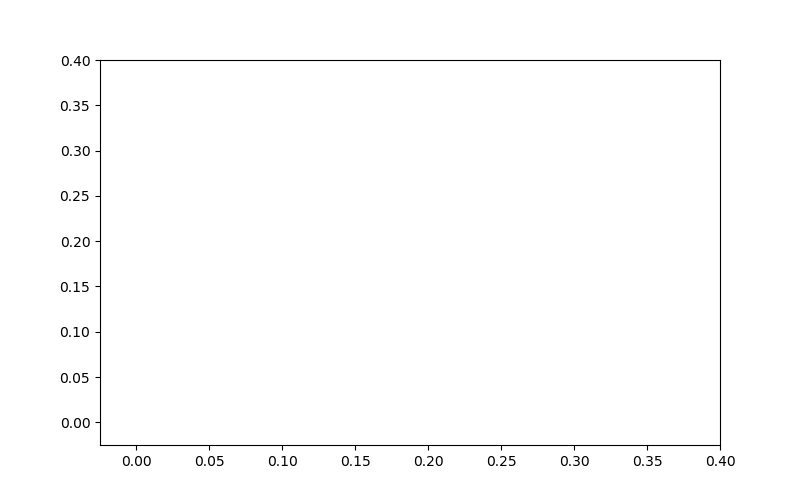

ValueError: Could not interpret input 'neg'

In [212]:
# Display the widgets
display(items_lda)
display(info_area)
display(items_sentiment)
#Plot size
plt.figure("Pos/Neg Plot",figsize=(8,5),edgecolor="b",facecolor="b",frameon=False)
# Plot the inital plot
action(drop_newspapers.value)

In [6]:
articles_df.text.str.len().quantile(0.85)

5046.0